In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('Doctor_Train.xlsx')
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


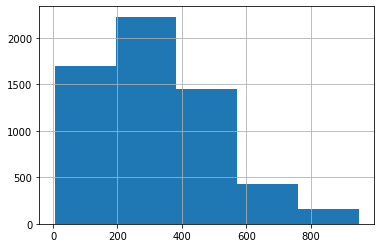

In [3]:
df['Fees'].hist(bins=5)
plt.show()

In [4]:
df['Experience'] = df['Experience'].str.split(" ").str[0]
df['Experience']= df['Experience'].astype(int)

In [5]:
df['Place'].isnull().sum()

25

In [6]:
df['Place'].fillna('Uknown,Uknown',inplace=True)

In [7]:
df['Place']= df['Place'].str.split(',')
df['City'] = df['Place'].str[-1]
df['Place']= df['Place'].str[0]

In [8]:
df['Rating'].isnull().sum()

3302

In [9]:
df['Rating'].fillna('-99%',inplace=True)
df['Rating']= df['Rating'].str[:-1]
df['Rating']= df['Rating'].astype(int)
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df['Rating']= pd.cut(df['Rating'],bins=bins,labels=labels,include_lowest=True)

In [10]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [11]:
# Extract relevant information
df["Qualification"]=df["Qualification"].str.split(",")
Qualification={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]= Qualification[each]+1
        else:
            Qualification[each]=1

In [12]:
Qualification

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2808,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 161,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

In [13]:
# Top 10 most occuring qualifications
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
most_qua

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [14]:
final_qua=[]
for tup in most_qua:
    final_qua.append(tup[0])
    
final_qua

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [15]:
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in
                                                   range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y]=1
            
df.drop("Qualification",axis=1,inplace=True)

In [16]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [17]:
df['Profile'].isnull().sum()

0

In [18]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [19]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Uknown                   25
e                         1
Name: City, dtype: int64

In [20]:
df[df['City']=='e'].index

Int64Index([3980], dtype='int64')

In [21]:
df['City'][3980] = 'Uknown'
df['Place'][3980] = 'Unknown'

In [22]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Uknown                   26
Name: City, dtype: int64

In [23]:
df['Place'].value_counts()

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Karukappilli         1
Ramamangalam         1
Rana Pratap Bagh     1
Paruthippara         1
Pappanamcode         1
Name: Place, Length: 867, dtype: int64

In [24]:
df = pd.get_dummies(df,columns=['City','Profile'],prefix=['City','Profile'])
df.head()

,Experience,Rating,Place,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Uknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df['Miscellaneous_Info'].isnull().sum()

2620

In [26]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

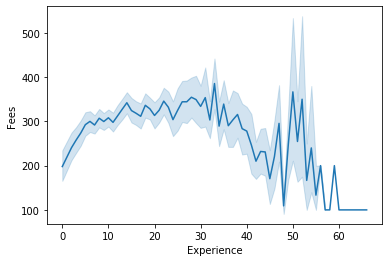

In [27]:
ax=sns.lineplot(x=df['Experience'],y=df['Fees'],data=df)
plt.show()

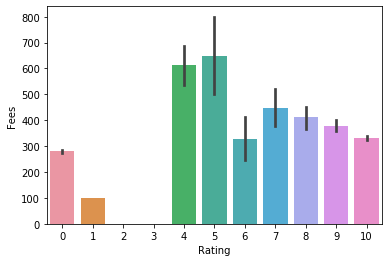

In [28]:
ax= sns.barplot(x=df['Rating'],y=df['Fees'],data=df)
plt.show()

In [29]:
X = df.drop(['Fees','Place'],axis=1)
y = df['Fees']
print(X.shape)
print(y.shape)
print(y.dtype)

(5961, 27)
(5961,)
int64


In [30]:
X = pd.get_dummies(X)
X.head()

,Experience,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),...,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,Rating_6,Rating_7,Rating_8,Rating_9,Rating_10
0,24,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4768, 37)
(1193, 37)
(4768,)
(1193,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
poly = PolynomialFeatures(degree=2)
Xtrain_poly = poly.fit_transform(X_train)
Xtest_poly = poly.fit_transform(X_test)

In [35]:
lm = LinearRegression()
lm.fit(Xtrain_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = lm.predict(Xtest_poly)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

23892338109.75839
-1.543175212189366e+16


In [38]:
from sklearn.svm import SVR
model = SVR(gamma="scale")
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = model.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

184.7250370621602
0.07753592988546654


In [42]:
import xgboost as xgb
df_dmatrix = xgb.DMatrix(data=X,label=y)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,
                          alpha=10,n_estimators=10)

In [47]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print(rmse)
print(r2)

202.34365989244844
-0.1885930766345294
